<a href="https://colab.research.google.com/github/AshwiniRatod/Web3/blob/main/AshwiniR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the datasets
trader_df = pd.read_csv('/content/drive/MyDrive/AshwiniRatod/csv_files/historical_data.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/AshwiniRatod/csv_files/fear_greed_index.csv')

trader_df.head(), sentiment_df.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [ ]:
# Convert trader timestamp
trader_df['Date_IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Extract only the date (remove time)
trader_df['Date'] = trader_df['Date_IST'].dt.date
trader_df['Date'] = pd.to_datetime(trader_df['Date'])


In [ ]:
# Convert sentiment date column
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

# Create a clean Date column
sentiment_df['Date'] = sentiment_df['date']


In [ ]:
sentiment_df = sentiment_df[['Date', 'classification', 'value']]
sentiment_df.columns = ['Date', 'Sentiment_Class', 'Sentiment_Value']

sentiment_df.head()


,Date,Sentiment_Class,Sentiment_Value
0,2018-02-01,Fear,30
1,2018-02-02,Extreme Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Extreme Fear,24
4,2018-02-05,Extreme Fear,11


In [ ]:
merged_df = pd.merge(
    trader_df,
    sentiment_df,
    on='Date',
    how='left'         # keep all trades even if sentiment missing
)

merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Date_IST,Sentiment_Class,Sentiment_Value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,2024-12-02,2024-12-02 22:50:00,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,2024-12-02,2024-12-02 22:50:00,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,2024-12-02,2024-12-02 22:50:00,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,2024-12-02,2024-12-02 22:50:00,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,2024-12-02,2024-12-02 22:50:00,Extreme Greed,80.0


In [ ]:
import os

output_path = '/content/drive/MyDrive/AshwiniRatod/outputs'
os.makedirs(output_path, exist_ok=True)


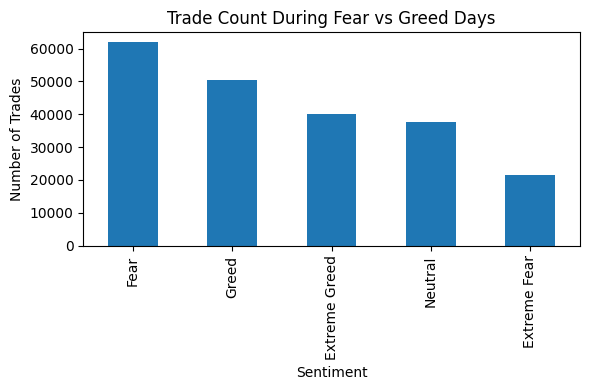

In [ ]:
import matplotlib.pyplot as plt

sent_count = merged_df['Sentiment_Class'].value_counts()

plt.figure(figsize=(6,4))
sent_count.plot(kind='bar')
plt.title("Trade Count During Fear vs Greed Days")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()

# Save image
plt.savefig(f"{output_path}/trade_count_sentiment.png")
plt.show()

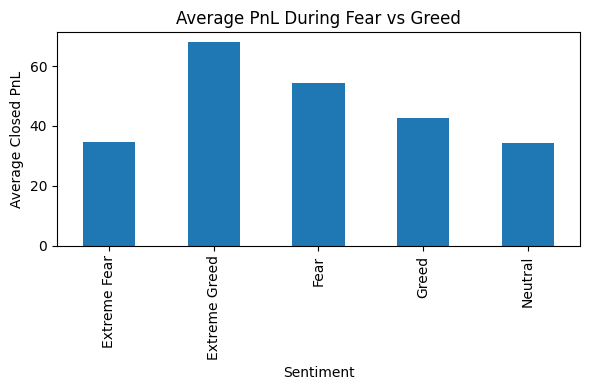

In [ ]:
pnl_sent = merged_df.groupby("Sentiment_Class")["Closed PnL"].mean()

plt.figure(figsize=(6,4))
pnl_sent.plot(kind='bar')
plt.title("Average PnL During Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Average Closed PnL")
plt.tight_layout()

plt.savefig(f"{output_path}/avg_pnl_sentiment.png")
plt.show()

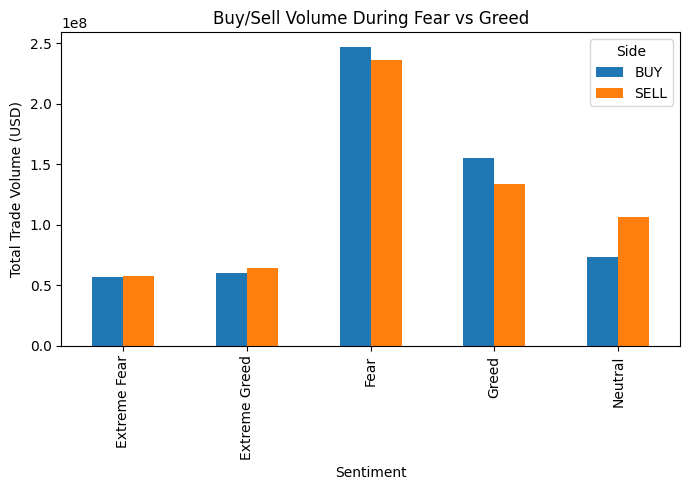

In [ ]:
vol_df = merged_df.groupby(["Sentiment_Class", "Side"])["Size USD"].sum().unstack()

vol_df.plot(kind='bar', figsize=(7,5))
plt.title("Buy/Sell Volume During Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Total Trade Volume (USD)")
plt.tight_layout()

plt.savefig(f"{output_path}/volume_sentiment.png")
plt.show()

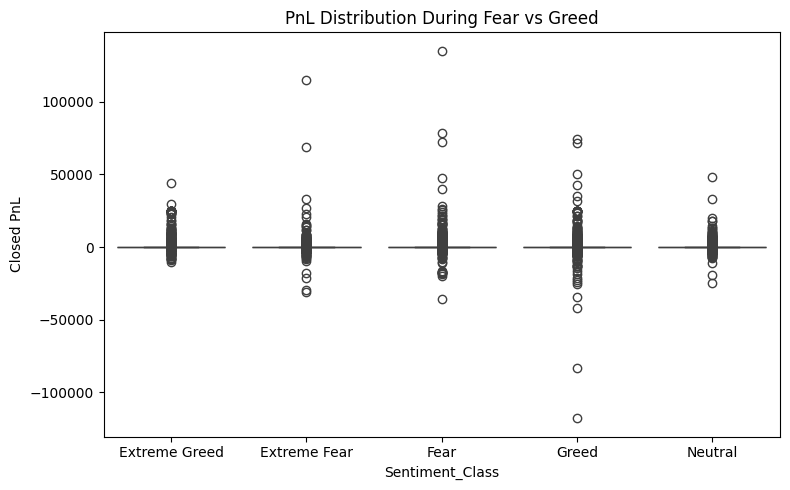

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='Sentiment_Class', y='Closed PnL')
plt.title("PnL Distribution During Fear vs Greed")
plt.tight_layout()

plt.savefig(f"{output_path}/pnl_distribution_sentiment.png")
plt.show()


In [ ]:
merged_df['Start Position']


,Start Position
0,0.000000
1,986.524596
2,1002.518996
3,1146.558564
4,1289.488521
...,...
211219,7546.600000
211220,7164.400000
211221,5040.300000
211222,4616.900000


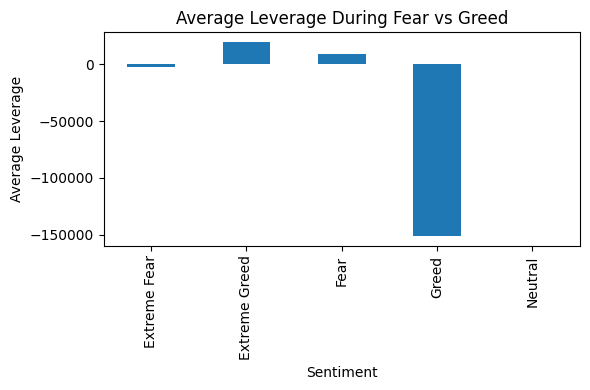

In [ ]:
leverage_sent = merged_df.groupby("Sentiment_Class")["Start Position"].mean()

plt.figure(figsize=(6,4))
leverage_sent.plot(kind="bar")
plt.title("Average Leverage During Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Average Leverage")
plt.tight_layout()

plt.savefig(f"{output_path}/avg_leverage_sentiment.png")
plt.show()


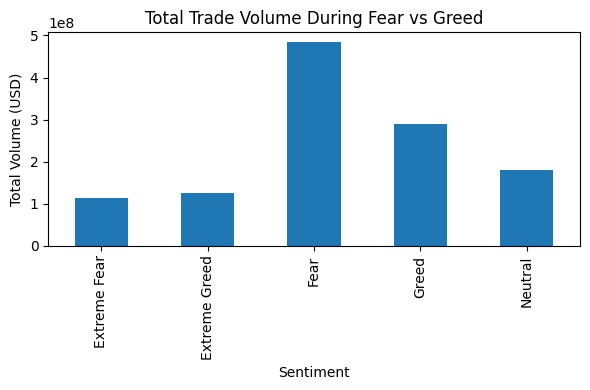

In [ ]:
vol_sent = merged_df.groupby("Sentiment_Class")["Size USD"].sum()

plt.figure(figsize=(6,4))
vol_sent.plot(kind="bar")
plt.title("Total Trade Volume During Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Total Volume (USD)")
plt.tight_layout()

plt.savefig(f"{output_path}/total_volume_sentiment.png")
plt.show()


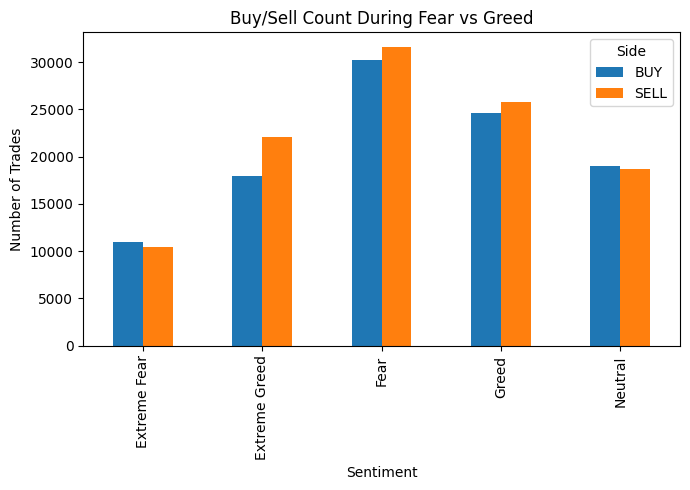

In [ ]:
import matplotlib.pyplot as plt

side_sent = merged_df.groupby(["Sentiment_Class","Side"]).size().unstack()

side_sent.plot(kind='bar', figsize=(7,5))
plt.title("Buy/Sell Count During Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()

plt.savefig(f"{output_path}/buy_sell_sentiment.png")
plt.show()


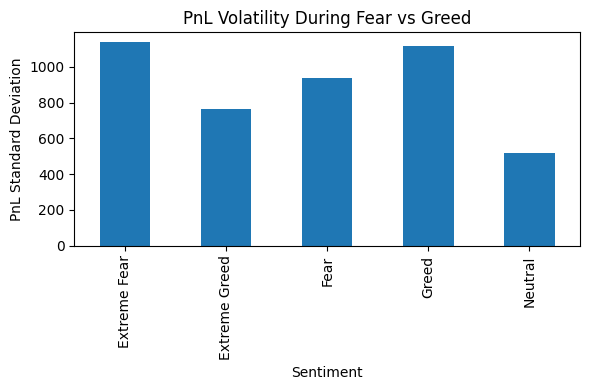

In [ ]:
volatility_df = merged_df.groupby("Sentiment_Class")["Closed PnL"].std()

plt.figure(figsize=(6,4))
volatility_df.plot(kind="bar")
plt.title("PnL Volatility During Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("PnL Standard Deviation")
plt.tight_layout()

plt.savefig(f"{output_path}/pnl_volatility.png")
plt.show()


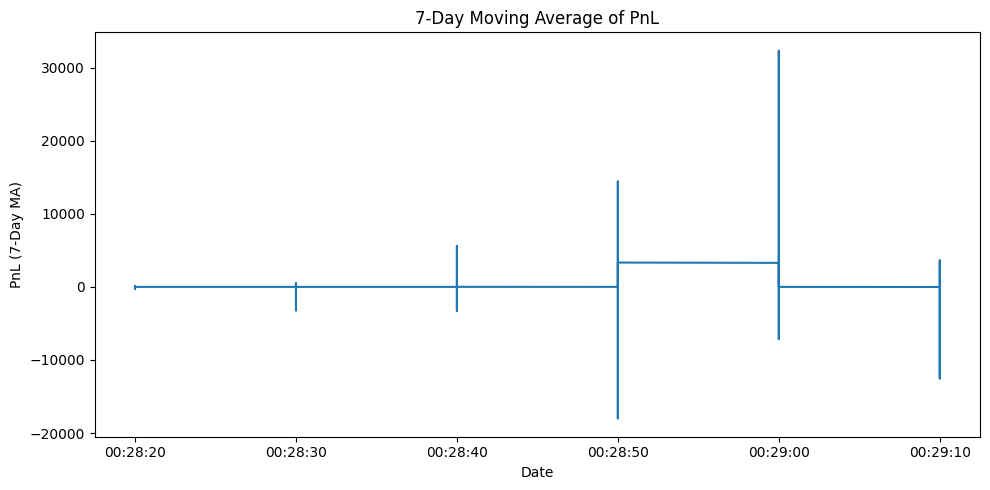

In [ ]:
merged_df = merged_df.sort_values("Timestamp")

merged_df["PnL_MA_7"] = merged_df["Closed PnL"].rolling(7).mean()

plt.figure(figsize=(10,5))
plt.plot(merged_df["Timestamp"], merged_df["PnL_MA_7"])
plt.title("7-Day Moving Average of PnL")
plt.xlabel("Date")
plt.ylabel("PnL (7-Day MA)")
plt.tight_layout()

plt.savefig(f"{output_path}/pnl_moving_average.png")
plt.show()
